In [92]:
print('Im working')

Im working


In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
# Imports for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn import preprocessing

In [94]:
# Defining all methods
# method to sample a dataset (hardcoded seed for randomized selection, see alternatives in comment)
def get_sample_from_dataset(dataset):
    # randomly define sample from dataset
    # good seeds to try: 13, 42, 1123, 5813, 213455
    np.random.seed(seed=42)
    # We are going to use bootstrapping
    sample_proportion =  0.05
    dataset_size = len(dataset)
    sample_size = sample_proportion * dataset_size
    print("The sample size we are going to use will be: "+ str(sample_size))
    # Run bootstrap
    chosen_idx = np.random.choice(dataset_size, replace=False, size=int(sample_size))
    sampled_dataset =  dataset.iloc[chosen_idx]
    print("The new shape of the sampled dataset is: " + str(sampled_dataset.values.shape))
    return sampled_dataset

# method to calculate mean, median, range, iqr, variance and std
# or just mean and std. all_values:Boolean defines that
def calc_descriptive(data, all_values):
    data_mean = np.mean(data)
    data_std = np.std(data)
    if all_values:
        data_median = np.median(data)
        data_range = np.ptp(data)
        data_iqr = stats.iqr(data)
        data_variance = np.var(data)
        return data_mean, data_median, data_range, data_iqr, data_variance, data_std    
    return data_mean, data_std

# method to calculate descriptive statistical information about given data & sample
def descr_analysis(data,sample,axis):
    data_mean, data_median, data_range, data_iqr, data_variance, data_std = calc_descriptive(data, True)    
    sample_mean, sample_median, sample_range, sample_iqr, sample_variance, sample_std = calc_descriptive(sample, True)    
    print('DESCRIPTIVE STATISTICS FOR ' + axis + ' AXIS')
    print("Absolute difference of means: {}".format(abs(data_mean - sample_mean)))
    print("Absolute difference of medians: {}".format(abs(data_median - sample_median)))
    print("Absolute difference of range: {}".format(abs(data_range - sample_range)))
    print("Absolute difference of interquartile range: {}".format(abs(data_iqr - sample_iqr)))
    print("Absolute difference of variance: {}".format(abs(data_variance - sample_variance)))
    print("Absolute difference of standard deviation: {}".format(abs(data_std - sample_std)))    
    plt.figure()
    sns.distplot(data, hist=False, kde=True, 
             hist_kws={'edgecolor':'blue'},
             kde_kws={'linewidth': 4},
             label = ''
            )
    sns.distplot(sample, hist=False, kde=True, 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 2},
             label = ''
            )
    plt.legend(('data','sample'),prop={'size': 10}, title = 'Feature ' + axis)

# method for custom scale calculation
def scale_sample_custom(data):
    x_mean, x_std = calc_descriptive(data, False)
    sample = get_sample_from_dataset(data)
    sample_scaled = [(j-x_mean)/x_std for j in sample]
    return sample_scaled

In [95]:
# Read the dataset
df3 = pd.read_csv("data/data3.csv")
df6 = pd.read_csv("data/data6.csv")

In [96]:
# scale both datasets
df6_scaled = preprocessing.scale(df6)
df3_scaled = preprocessing.scale(df3)

# spliting standardised dataset into individual feature arrays
# 6-dimensional dataset
x_vals_6d = (df6_scaled[:,0])
y_vals_6d = (df6_scaled[:,1])
z_vals_6d = (df6_scaled[:,2])
u_vals_6d = (df6_scaled[:,3])
v_vals_6d = (df6_scaled[:,4])
w_vals_6d = (df6_scaled[:,5])
# 3-dimensional dataset
x_vals_3d = (df3_scaled[:,0])
y_vals_3d = (df3_scaled[:,1])
z_vals_3d = (df3_scaled[:,2])

# generate standardized samples of the individual dataset features from original dataset
# 6-dimensional dataset
sample_x_vals_6d = scale_sample_custom(df6['V1'])
sample_y_vals_6d = scale_sample_custom(df6['V2'])
sample_z_vals_6d = scale_sample_custom(df6['V3'])
sample_u_vals_6d = scale_sample_custom(df6['V4'])
sample_v_vals_6d = scale_sample_custom(df6['V5'])
sample_w_vals_6d = scale_sample_custom(df6['V6'])
# 3-dimensional dataset
sample_x_vals_3d = scale_sample_custom(df3['V1'])
sample_y_vals_3d = scale_sample_custom(df3['V2'])
sample_z_vals_3d = scale_sample_custom(df3['V3'])

The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000,)


DESCRIPTIVE STATISTICS FOR x AXIS
Absolute difference of means: 0.005454996538062543
Absolute difference of medians: 0.002540855381972727
Absolute difference of range: 13.170385596811876
Absolute difference of interquartile range: 0.014629757916799546
Absolute difference of variance: 0.009562832479616867
Absolute difference of standard deviation: 0.004770039600911269
DESCRIPTIVE STATISTICS FOR y AXIS
Absolute difference of means: 0.013437331257914437
Absolute difference of medians: 0.012493235217912721
Absolute difference of range: 3.3216231712066424
Absolute difference of interquartile range: 0.014251342372598064
Absolute difference of variance: 0.003521430491856048
Absolute difference of standard deviation: 0.0017591679100600333


C:\Users\Panagiotis\Miniconda2\envs\Python_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


DESCRIPTIVE STATISTICS FOR z AXIS
Absolute difference of means: 0.007035973125113771
Absolute difference of medians: 0.003229963822315193
Absolute difference of range: 8.197191093859757
Absolute difference of interquartile range: 0.021638762780767595
Absolute difference of variance: 0.0012837105774375912
Absolute difference of standard deviation: 0.0006416494317222909
DESCRIPTIVE STATISTICS FOR u AXIS
Absolute difference of means: 0.0018227759874937534
Absolute difference of medians: 0.0027351156407458953
Absolute difference of range: 0.7252419680399731
Absolute difference of interquartile range: 0.023029220851686016
Absolute difference of variance: 0.014644839614471272
Absolute difference of standard deviation: 0.007349426844708407
DESCRIPTIVE STATISTICS FOR v AXIS
Absolute difference of means: 0.001326465502043786
Absolute difference of medians: 0.008007250343211217
Absolute difference of range: 1.3405840510088716
Absolute difference of interquartile range: 0.018372899055823844
Absol

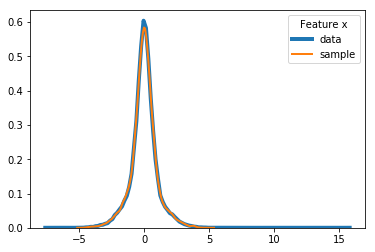

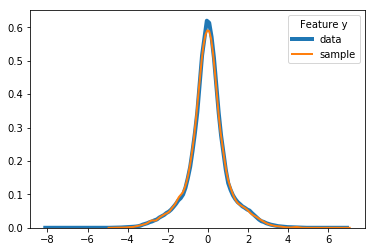

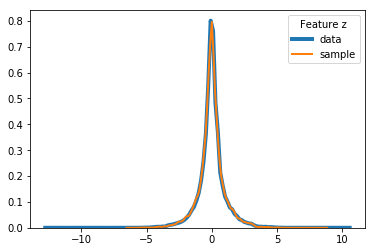

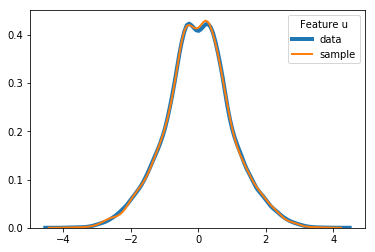

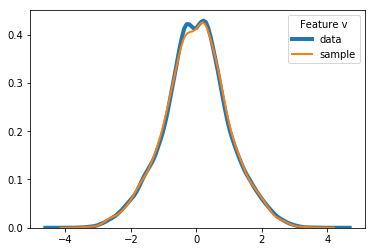

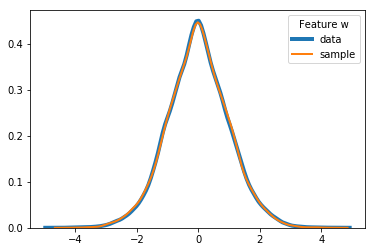

In [97]:
descr_analysis(x_vals_6d, sample_x_vals_6d, 'x')
descr_analysis(y_vals_6d, sample_y_vals_6d,  'y')
descr_analysis(z_vals_6d, sample_z_vals_6d,  'z')
descr_analysis(u_vals_6d, sample_u_vals_6d,  'u')
descr_analysis(v_vals_6d, sample_v_vals_6d,  'v')
descr_analysis(w_vals_6d, sample_w_vals_6d,  'w')

DESCRIPTIVE STATISTICS FOR x AXIS
Absolute difference of means: 0.0013869213388670654
Absolute difference of medians: 0.009046139333165948
Absolute difference of range: 4.0842154026109885
Absolute difference of interquartile range: 0.0217702363719674
Absolute difference of variance: 0.002519619597303069
Absolute difference of standard deviation: 0.0012606043603280437
DESCRIPTIVE STATISTICS FOR y AXIS
Absolute difference of means: 0.005675008561313743
Absolute difference of medians: 0.00401374945611821
Absolute difference of range: 0.230892878032102
Absolute difference of interquartile range: 0.022996880266408004
Absolute difference of variance: 0.0168890373857582
Absolute difference of standard deviation: 0.008480477945975062


C:\Users\Panagiotis\Miniconda2\envs\Python_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


DESCRIPTIVE STATISTICS FOR z AXIS
Absolute difference of means: 0.006134133570226588
Absolute difference of medians: 0.001966116479520552
Absolute difference of range: 0.12149048352584924
Absolute difference of interquartile range: 0.007146597524054332
Absolute difference of variance: 0.013167045382315945
Absolute difference of standard deviation: 0.006605337935780886


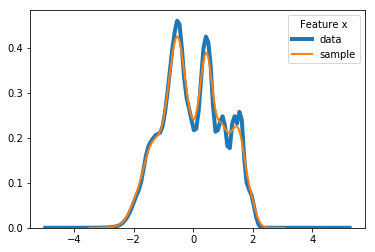

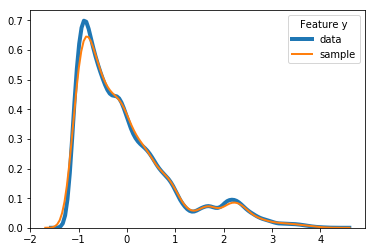

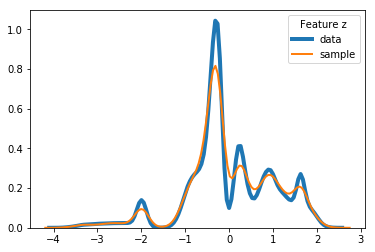

In [98]:
descr_analysis(x_vals_3d, sample_x_vals_3d, 'x')
descr_analysis(y_vals_3d, sample_y_vals_3d,  'y')
descr_analysis(z_vals_3d, sample_z_vals_3d,  'z')

(scale)
    PCA 3->2 AND 6->2
    scaterplots
Sampling
    num of samples
    clustering
    hopkin's

In [99]:
from sklearn.decomposition import PCA
# 6-dimensional sample data
# form a sample dataframe from separated sample features 
sample_d6 = {'V1' : sample_x_vals_6d, 'V2' : sample_y_vals_6d, 'V3' : sample_z_vals_6d, 'V4' : sample_u_vals_6d, 'V5' : sample_v_vals_6d, 'V6' : sample_w_vals_6d}
sample_df6 = pd.DataFrame(data=sample_d6)
# PCA for two resulting components
pca = PCA(n_components=2)
pca_components_d6 = pca.fit_transform(sample_df6) 
# form dataframe for resulting PCA sample
sample_pca_df6 = pd.DataFrame(data=pca_components_d6, columns = ['PCA 1', 'PCA 2'])
print(sample_pca_df6)

          PCA 1     PCA 2
0      0.597269 -0.029849
1     -0.473236 -0.079467
2      0.381185 -0.619706
3     -0.552425 -1.564760
4     -0.156082 -0.901761
5      0.215186  0.158654
6     -0.702729  0.825371
7      0.401847  2.364734
8      0.821794  0.223307
9     -1.088062  1.075651
10    -0.397914  0.023644
11     0.098105  0.687182
12    -0.661991 -0.027247
13    -0.324638 -0.887210
14     0.566489 -0.432245
15     0.378087  0.130237
16    -0.106584 -1.359067
17     1.843171  0.897658
18     0.276091 -0.301282
19    -1.907682  0.140129
20    -0.507187  1.264870
21    -2.802550  1.175320
22    -0.591761 -1.724122
23     0.912758  0.237454
24     1.128385 -1.560473
25    -1.022774  0.512446
26     1.290260  1.266921
27     0.327965 -0.152681
28     0.838249 -0.278949
29    -0.851311  0.292102
...         ...       ...
14970  1.533723 -0.098873
14971 -0.790243 -0.155729
14972 -0.600822  1.519871
14973  0.989909  0.524115
14974 -1.600177 -1.541923
14975  0.999041 -1.000625
14976 -0.540

In [100]:
# 3-dimensional sample data
# form a sample dataframe from separated sample features 
sample_d3 = {'V1' : sample_x_vals_3d, 'V2' : sample_y_vals_3d, 'V3' : sample_z_vals_3d}
sample_df3 = pd.DataFrame(data=sample_d3)
# PCA for two resulting components
pca = PCA(n_components=2)
pca_components_d3 = pca.fit_transform(sample_df3) 
# form dataframe for resulting PCA sample
sample_pca_df3 = pd.DataFrame(data=pca_components_d3, columns = ['PCA 1', 'PCA 2'])
print(sample_pca_df3)

          PCA 1     PCA 2
0     -1.098033  0.433594
1     -0.418884  0.568216
2      1.010128  0.905364
3     -0.235979  0.525384
4      2.814176  1.637220
5      0.029145  0.861226
6      0.262347 -0.979252
7     -1.063776  0.471343
8     -1.632697  0.468392
9     -1.058742  0.379103
10    -2.418822  0.521502
11    -0.916737  0.586158
12     0.293022 -0.477868
13     1.125998  0.459081
14    -0.141926  0.618301
15    -0.061580 -0.850953
16    -1.058824 -0.128826
17     0.031098 -0.085890
18    -0.790146 -0.222701
19    -0.443965 -0.834713
20    -1.172122  0.491117
21    -0.619143 -0.846242
22     1.050193 -2.015494
23    -0.975024 -0.604386
24     2.247521 -1.916030
25     0.268572 -0.425722
26    -1.496537 -0.414188
27    -1.248346 -0.413864
28    -1.025014  0.523000
29    -0.064051  0.379449
...         ...       ...
14970  0.208497 -1.597648
14971 -1.327315 -0.100101
14972  0.030555 -0.030229
14973  2.073640 -1.841740
14974  1.860586 -2.087861
14975  0.324337  0.383546
14976 -2.436

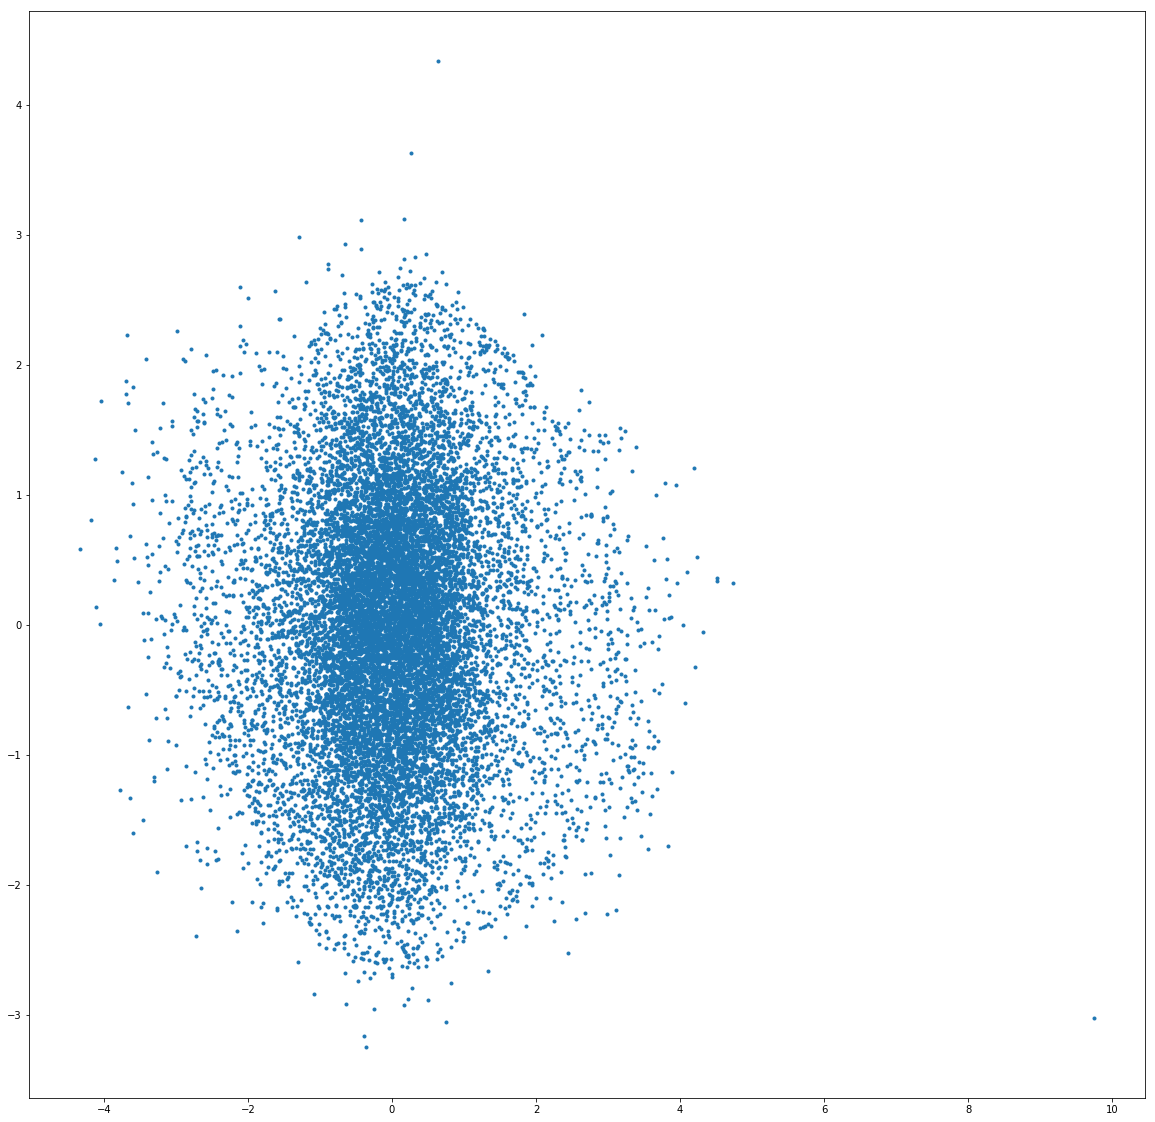

In [101]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

# to check for PCA from 6 to 3
# ax = fig.add_subplot(111, projection='3d')
# sequence_containing_x_vals = list(sample_pca_df6['PCA 1'])
# sequence_containing_y_vals = list(sample_pca_df6['PCA 2'])
# sequence_containing_z_vals = list(sample_pca_df6['PCA 3'])
# ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)

plt.scatter(sample_pca_df6['PCA 1'],sample_pca_df6['PCA 2'],marker='.')

fig.set_size_inches(20, 20, forward=True)

plt.show()

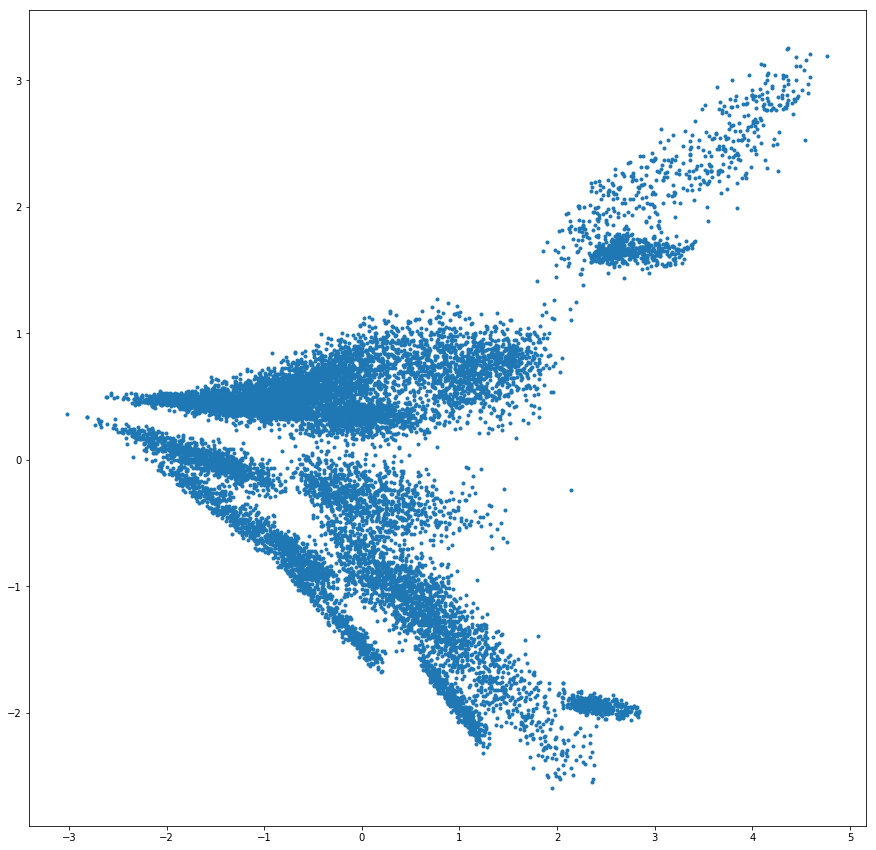

In [102]:
fig = plt.figure()
plt.scatter(sample_pca_df3['PCA 1'],sample_pca_df3['PCA 2'],marker='.')
fig.set_size_inches(15, 15, forward=True)
plt.show()